In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv',engine='c',memory_map=True)

In [35]:
#J'ai pris ces valeurs sur un notebook Kaggle. J'utilise aussi ces valeurs dans precisePrediction. J'avais des prédiction un tout petit peu plus précise avec les anciennes valeurs que j'avais mise mais elles gardaient des points loin
dfGoodLocation = df[(df.pickup_longitude >= -74.05) & (df.pickup_longitude <= -73.7) & (df.pickup_latitude >= 40.60) & (df.pickup_latitude <= 40.9) & (df.dropoff_longitude >= -74.05) & (df.dropoff_longitude <= -73.7) & (df.dropoff_latitude >= 40.60) & (df.dropoff_latitude <= 40.9)]

In [36]:
from sklearn.cluster import KMeans
import time
# BIEN PENSER A CHOISIR NJOBS EN FONCTION DU NOMBRE DE PROCESSEURS
start = time.time()
kmeanPickup = KMeans(n_clusters=15,random_state=2,n_init=1).fit(dfGoodLocation[['pickup_longitude','pickup_latitude']])
end = time.time()
print(format(end-start))

5.96394681930542


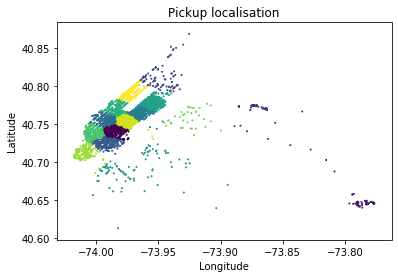

In [37]:
plt.scatter(dfGoodLocation.pickup_longitude[:5000],dfGoodLocation.pickup_latitude[:5000],marker='o',c=kmeanPickup.labels_[:5000],s=1)

plt.title('Pickup localisation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()